
# Project: FBI NICS Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> This project investigates and analyzs datasets associated with the number of firearms and explosives eligibility checks by month, state and type. The focuse will be on analyzing which states have the highest growth in gun registrations and for which type of gun. Further analysis will look into the overall trend of gun purchases over the years.


In [557]:
#Importing my libraries into jupyter notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> There are two datasets provided for this project but I will import only one of them- the gun dataset into pandas dataframe in these jupyter notebook as that is the only dataset useful for my analysis.


### General Properties

In [992]:
# loading my datasets into jupyter notebook
df_gun = pd.read_csv('C:/Users/user/Desktop/ProjectDatasets/gun_data.csv')

In [993]:
#Assessing the structure of the gun data
df_gun.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [994]:
df_gun.tail()

month          state  permit  permit_recheck  handgun  long_gun  \
12480  1998-11       Virginia     0.0             NaN     14.0       2.0   
12481  1998-11     Washington     1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia     3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin     0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming     8.0             NaN     45.0      49.0   

       other  multiple  admin  prepawn_handgun  ...  returned_other  \
12480    NaN         8    0.0              NaN  ...             NaN   
12481    NaN         8    1.0              NaN  ...             NaN   
12482    NaN         5    0.0              NaN  ...             NaN   
12483    NaN         2    0.0              NaN  ...             NaN   
12484    NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12480                        NaN                     NaN      24  
12481                        NaN                     NaN     361  
12482                        NaN                     NaN     408  
12483                        NaN                     NaN     241  
12484                        NaN                     NaN     107  

[5 rows x 27 columns]

In [598]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [658]:
#Assesing the datasets
df_gun.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  ...  returned_other  rentals_handgun  \
count      10540.000000    5115.000000  ...     1815.000000       990.000000   
mean           7.834156       0.165591  ...        1.027548         0.076768   
std           16.468028       1.057105  ...        4.386296         0.634503   
min            0.000000       0.000000  ...        0.000000         0.000000   
25%            0.000000       0.000000  ...        0.000000         0.000000   
50%            1.000000       0.000000  ...        0.000000         0.000000   
75%            8.000000       0.000000  ...        0.000000         0.000000   
max          269.000000      49.000000  ...       64.000000        12.000000   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
count        825.000000           2750.000000            2750.000000   
mean           0.087273             14.936000              11.602909   
std            0.671649             71.216021              54.253090   
min            0.000000              0.000000               0.000000   
25%            0.000000              0.000000               0.000000   
50%            0.000000              0.000000               0.000000   
75%            0.000000              2.000000               4.000000   
max           12.000000           1017.000000             777.000000   

       private_sale_other  return_to_seller_handgun  \
count         2750.000000               2475.000000   
mean             1.030182                  0.402020   
std              4.467843                  1.446568   
min              0.000000                  0.000000   
25%              0.000000                  0.000000   
50%              0.000000                  0.000000   
75%              0.000000                  0.000000   
max             71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count                2750.000000             2255.000000   12485.000000  
mean                    0.441818                0.105987   21595.725911  
std                     1.528223                0.427363   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

In [513]:
df_gun.shape

(12485, 27)

In [514]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [608]:
#Checking for duplicated values in the column labelled 'state'
gun_df.state.duplicated().sum()

12430

In [703]:
gun_df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [614]:
#Checking the number of unique values in the 'State' column
gun_df.state.nunique()

55

In [613]:
#Checking for unique values in the 'Permit' column
gun_df.permit.nunique()

5390

In [682]:
#Checking for duplicated values in the permit column
gun_df.permit.duplicated().sum()

7094

## About the structure of the Gun Dataset

- Missing Values- The gun data has lots of feature columns with null values in their rows. These columns will be treated during the data cleaning stage.

- Incorrect datatype - Majority of the features are of float datatype and will be converted to type 'int' since gun permit checks and purchases count should not be floating point numbers. The 'month' column has the datatype 'object' which will be changed to datetime datatype.

- Duplicate Values- The entries in the state and other data columns which are duplicated will be ignored in our analysis since the data is a collection of firearm permit checks and purchases over a given period of time.

- Inconsist datatypes - Columns with inconsistent datatypes will be removed

# Data Cleaning

In [995]:
#Changing the datatype for the feature column 'Month'
df_gun['month'] = pd.to_datetime(df_gun['month'])
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

In [996]:
#Rounding up the variables containing the various gun types since these variables will be used in our analysis
df_gun['permit'] = round(df_gun['permit'])
df_gun['permit_recheck'] = round(df_gun['permit_recheck'])
df_gun['handgun'] = round(df_gun['handgun'])
df_gun['long_gun'] = round(df_gun['long_gun'])
df_gun['other'] = round(df_gun['other'])


In [997]:
#Calculating mean of values to fill-up columns rows with null values
permit_mean = df_gun['permit'].mean()
permit_recheck_mean= df_gun['permit_recheck'].mean()
handgun_mean= df_gun['handgun'].mean()
long_gun_mean = df_gun['long_gun'].mean()
prepawn_long_gun_mean = df_gun['prepawn_long_gun'].mean()
multiple_mean = df_gun['multiple'].mean()
admin_mean = df_gun['admin'].mean()
prepawn_handgun_mean= df_gun['prepawn_handgun'].mean()
prepawn_long_run_mean = df_gun['prepawn_long_gun'].mean()
other_mean = df_gun['other'].mean()
prepawn_other_mean = df_gun['prepawn_other'].mean()
redemption_handgun_mean = df_gun['redemption_handgun'].mean()
redemption_long_gun_mean = df_gun['redemption_long_gun'].mean()
redemption_other_mean = df_gun['redemption_other'].mean()
returned_handgun_mean = df_gun['returned_handgun'].mean()
returned_long_gun_mean = df_gun['returned_long_gun'].mean()
returned_other_mean = df_gun['returned_other'].mean()
returned_handgun_mean = df_gun['returned_handgun'].mean()
returned_long_gun_mean = df_gun['returned_long_gun'].mean()
returned_other_mean = df_gun['returned_other'].mean()
rentals_handgun_mean = df_gun['rentals_handgun'].mean()
rentals_long_gun_mean = df_gun['rentals_long_gun'].mean()
private_sale_handgun_mean = df_gun['private_sale_handgun'].mean()
private_sale_long_gun_mean = df_gun['private_sale_long_gun'].mean()
private_sale_other_mean = df_gun['private_sale_other'].mean()
return_to_seller_handgun_mean = df_gun['return_to_seller_handgun'].mean()
return_to_seller_long_gun_mean = df_gun['return_to_seller_long_gun'].mean()
return_to_seller_other_mean = df_gun['return_to_seller_other'].mean()

In [998]:
#Filling the missing values for each series with mean values.
df_gun['permit'].fillna(permit_mean, inplace=True)
df_gun['permit_recheck'].fillna(permit_recheck_mean, inplace=True)
df_gun['handgun'].fillna(handgun_mean, inplace=True)
df_gun['long_gun'].fillna(long_gun_mean, inplace=True)
df_gun['prepawn_long_gun'].fillna(prepawn_long_gun_mean, inplace=True)
df_gun['multiple'].fillna(multiple_mean, inplace=True)
df_gun['admin'].fillna(admin_mean, inplace=True)
df_gun['prepawn_handgun'].fillna(prepawn_handgun_mean, inplace=True)
df_gun['other'].fillna(other_mean, inplace=True)
df_gun['prepawn_other'].fillna(prepawn_other_mean, inplace=True)
df_gun['redemption_handgun'].fillna(redemption_handgun_mean, inplace=True)
df_gun['redemption_long_gun'].fillna(redemption_long_gun_mean, inplace=True)
df_gun['redemption_other'].fillna(redemption_other_mean, inplace=True)
df_gun['returned_handgun'].fillna(returned_handgun_mean, inplace=True)
df_gun['returned_long_gun'].fillna(returned_long_gun_mean, inplace=True)
df_gun['returned_other'].fillna(returned_other_mean, inplace=True)
df_gun['returned_handgun'].fillna(returned_handgun_mean, inplace=True)
df_gun['returned_long_gun'].fillna(returned_long_gun_mean, inplace=True)
df_gun['returned_other'].fillna(returned_other_mean, inplace=True)
df_gun['rentals_handgun'].fillna(rentals_handgun_mean, inplace=True)
df_gun['rentals_long_gun'].fillna(rentals_long_gun_mean, inplace=True)
df_gun['private_sale_handgun'].fillna(private_sale_handgun_mean, inplace=True)
df_gun['private_sale_long_gun'].fillna(private_sale_long_gun_mean, inplace=True)
df_gun['private_sale_other'].fillna(private_sale_other_mean, inplace=True)
df_gun['return_to_seller_handgun'].fillna(return_to_seller_handgun_mean, inplace=True)
df_gun['return_to_seller_long_gun'].fillna(return_to_seller_long_gun_mean, inplace=True) 
df_gun['return_to_seller_other'].fillna(return_to_seller_other_mean, inplace=True)

In [999]:
#Converting the rounded-up variables above to 'int' datatypes
df_gun['permit'] = df_gun['permit'].astype(int)
df_gun['permit_recheck'] = df_gun['permit_recheck'].astype(int)
df_gun['handgun'] = df_gun['handgun'].astype(int)
df_gun['long_gun'] = df_gun['long_gun'].astype(int)
df_gun['other'] = df_gun['other'].astype(int)

In [676]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  int32         
 3   permit_recheck             12485 non-null  int32         
 4   handgun                    12485 non-null  int32         
 5   long_gun                   12485 non-null  int32         
 6   other                      12485 non-null  int32         
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

In [1000]:
df_gun.head()

month       state  permit  permit_recheck  handgun  long_gun  other  \
0 2017-09-01     Alabama   16717               0     5734      6320    221   
1 2017-09-01      Alaska     209               2     2320      2930    219   
2 2017-09-01     Arizona    5069             382    11063      7946    920   
3 2017-09-01    Arkansas    2935             632     4347      6063    165   
4 2017-09-01  California   57839               0    37165     24581   2984   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [681]:
df_gun.duplicated().sum()

0

In [1001]:
#Since we will be analyzing the trend of gun purchases over the years, the date column will be narrowed down to year and month
df_gun['year'] = pd.DatetimeIndex(df_gun['month']).year
df_gun['month'] =  pd.DatetimeIndex(df_gun['month']).month

In [715]:
df_gun.head()

month       state  permit  permit_recheck  handgun  long_gun  other  \
0      9     Alabama   16717               0     5734      6320    221   
1      9      Alaska     209               2     2320      2930    219   
2      9     Arizona    5069             382    11063      7946    920   
3      9    Arkansas    2935             632     4347      6063    165   
4      9  California   57839               0    37165     24581   2984   

   multiple  admin  prepawn_handgun  ...  rentals_handgun  rentals_long_gun  \
0       317    0.0             15.0  ...              0.0               0.0   
1       160    0.0              5.0  ...              0.0               0.0   
2       631    0.0             13.0  ...              0.0               0.0   
3       366   51.0             12.0  ...              0.0               0.0   
4         0    0.0              0.0  ...              0.0               0.0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                   9.0                   16.0                 3.0   
1                  17.0                   24.0                 1.0   
2                  38.0                   12.0                 2.0   
3                  13.0                   23.0                 0.0   
4                   0.0                    0.0                 0.0   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        2.0   
4                       0.0                        0.0   

   return_to_seller_other  totals  year  
0                     3.0   32019  2017  
1                     0.0    6303  2017  
2                     0.0   28394  2017  
3                     1.0   17747  2017  
4                     0.0  123506  2017  

[5 rows x 28 columns]

In [1002]:
#Shifting the year column to the first index position
cols = list(df_gun.columns.values)
cols.pop(cols.index('year'))
df_gun = df_gun[['year']+cols]

In [847]:
df_gun.head()

year  month       state  permit  permit_recheck  handgun  long_gun  other  \
0  2017      9     Alabama   16717               0     5734      6320    221   
1  2017      9      Alaska     209               2     2320      2930    219   
2  2017      9     Arizona    5069             382    11063      7946    920   
3  2017      9    Arkansas    2935             632     4347      6063    165   
4  2017      9  California   57839               0    37165     24581   2984   

   multiple  admin  ...  returned_other  rentals_handgun  rentals_long_gun  \
0       317    0.0  ...             0.0              0.0               0.0   
1       160    0.0  ...             0.0              0.0               0.0   
2       631    0.0  ...             0.0              0.0               0.0   
3       366   51.0  ...             0.0              0.0               0.0   
4         0    0.0  ...             0.0              0.0               0.0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                   9.0                   16.0                 3.0   
1                  17.0                   24.0                 1.0   
2                  38.0                   12.0                 2.0   
3                  13.0                   23.0                 0.0   
4                   0.0                    0.0                 0.0   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        2.0   
4                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 28 columns]

> Now that we have cleaned and assessed the dataset for analysis, lets move on to explore the variables we shall be working with.

## EDA with Histogram

>Lets use histogram to explore the distribution of entries in our variables which are most relevant to our analysis

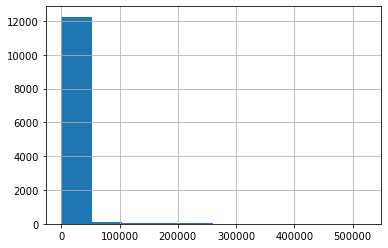

In [1003]:
df_gun.permit.hist();

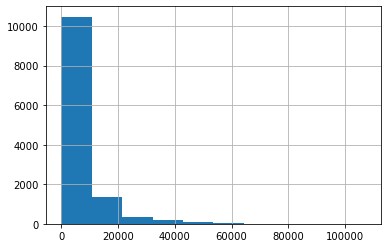

In [1004]:
df_gun.handgun.hist();

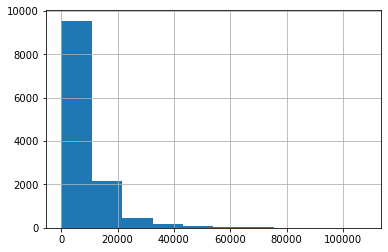

In [797]:
df_gun.long_gun.hist();

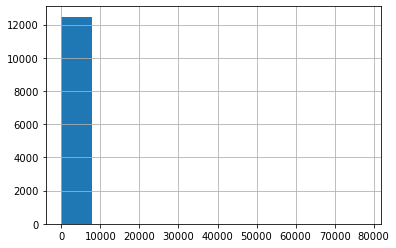

In [1005]:
df_gun.other.hist();

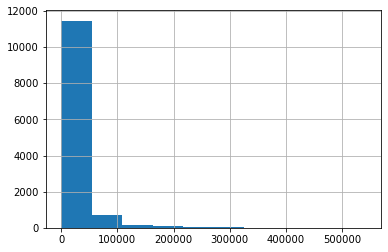

In [1014]:
df_gun.totals.hist();

## Inight Drawn from EDA

> It can be clearly seen that our data is not normally distributed as there is significant skewness to the right indicating that the number of gun purchases are minimal compared to the overall number of both checks and purchases

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which state has the highest growth rate in Gun registration?

In [1006]:
registration_means= df_gun.groupby('state')['permit'].mean().round().sort_values(ascending=False).head(8)
registration_means

state
Kentucky          109810.0
Illinois           41844.0
California         28769.0
North Carolina     17062.0
Michigan           14595.0
Indiana            13065.0
Texas              12588.0
Utah               12130.0
Name: permit, dtype: float64

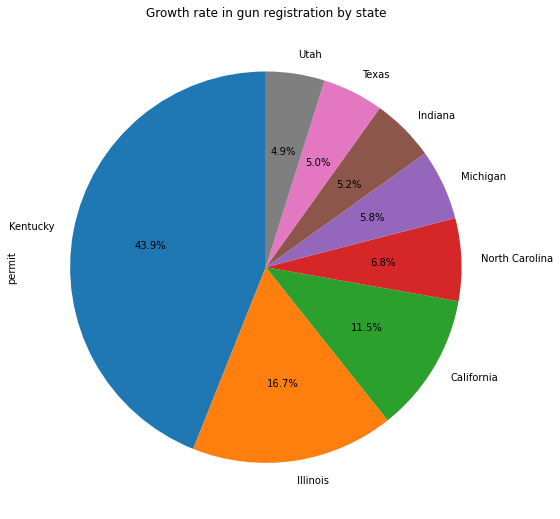

In [1007]:
registration_means.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(9,9))
plt.title('Growth rate in gun registration by state');

From this visualization, the state with the highest gun registration as defined by the permits given is Kentucky

### Research Question 2: For the state with the highest Gun registration, what gun type recorded the highest registration?

In [913]:
#Using query to select (truncate) the data where state is kentucky
df_kentucky = df_gun.query("state == 'Kentucky'")

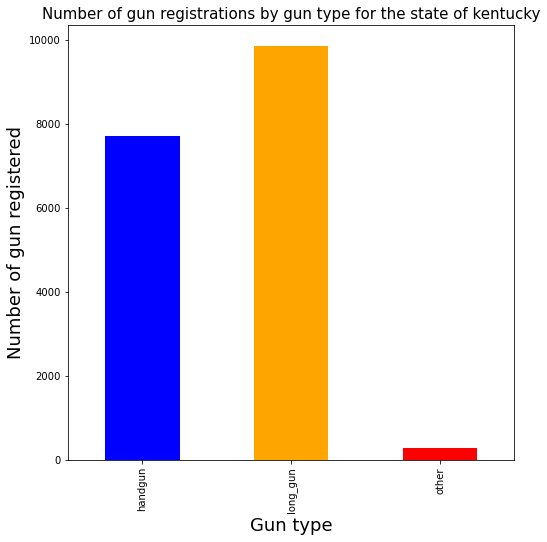

In [912]:
#Plotting a bar chart to visualize the data variable
colors=['blue', 'orange', 'red']
df_kentucky.iloc[:, 5:8].mean().plot(kind='bar', color=colors, figsize=(8,8))
plt.title('Number of gun registrations by gun type for the state of kentucky', fontsize=15)
plt.xlabel('Gun type', fontsize=18)
plt.ylabel('Number of gun registered', fontsize=18);

> This visualization informs us that long gun recorded the highest number of purchases for the state of Kentucky with the highest gun registration

### Research Question 2: What month was the highest Gun registration recorded for the State with the highest purchase?.

>Let's visualize the month with the highest recorded permit for gun purchase. This data will be visualized using the column feature 'permit' with the dataset filtered to 'kentucky' state

In [1079]:
df_kentucky_month = df_kentucky.groupby('month', as_index=True)['permit'].mean().round().sort_values(ascending=False)
df_kentucky_month

month
3     121943.0
1     117980.0
7     115131.0
12    113458.0
6     111755.0
5     111281.0
4     110944.0
9     107437.0
2     106280.0
10    102849.0
8     100984.0
11     97306.0
Name: permit, dtype: float64

In [1084]:
#Using pandas groupby function to group the dataset by month to visualize the mean for the number of permits in Kentucky
df_kentucky_month = df_kentucky.groupby('month', as_index=True)['permit'].mean().round().sort_values(ascending=True)

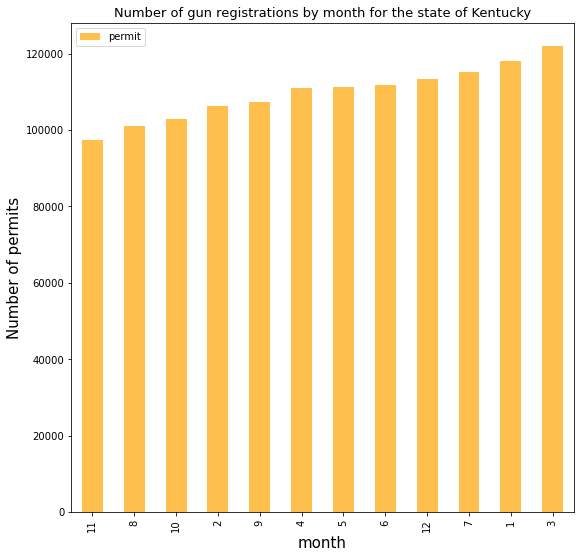

In [1106]:
#Using the bar plot to visualize the figures calculated
df_kentucky_month.plot(kind='bar', color='orange',tick_label=labels, alpha=.7, figsize=(9,9))
plt.legend(loc='upper left')
plt.title('Number of gun registrations by month for the state of Kentucky', fontsize=13)
plt.ylabel('Number of permits', fontsize=15)
plt.xlabel('month', fontsize=15);

> This visualization shows the month of march as having the highest number of gun permit checks and purchases

### Research Question 2: What is the overall trend of Gun purchases?

In [1041]:
#Using the groupby function to extract data for years and totals
df_totals = df_gun.groupby('year', as_index=False)['totals'].mean().round().astype(int)
df_totals

year  totals
0   1998    8108
1   1999   13703
2   2000   12768
3   2001   13364
4   2002   12677
5   2003   12731
6   2004   13000
7   2005   13435
8   2006   15141
9   2007   16913
10  2008   19232
11  2009   21189
12  2010   21698
13  2011   24753
14  2012   29491
15  2013   31768
16  2014   31606
17  2015   34888
18  2016   41554
19  2017   36345

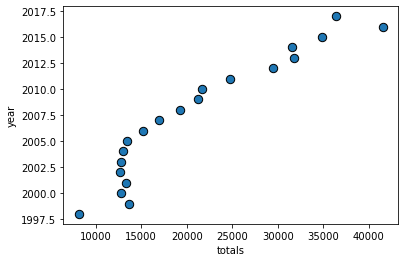

In [1114]:
df_totals.plot(x='totals', y='year', edgecolors="k", s=70, kind='scatter');

> From the visualization above, it can deduced that there is an increasing trend of gun eligibility checks and purchases over the years with year-2017 having the peak value, before a slight decline surfaced. It is possible that the preceeding year-2018 might record a decline in gun purchases

<a id='conclusions'></a>
## Conclusions

> - In conclusion, the city of kentucky has the highest growth in gun purchases for all time. The FBI might have to look at reviewing the eligible to understand the surge in the number of permits given.
> - There is a high demand of long gun compared to other types of gun. This could be a good business insight for Gun shops as they might consider stocking up more of long guns than other types of gun.
> - Permit checks seems to occur the more during the spring than other seasons of the year.
> - The general trend shows that gun purchases is increasing over time

# Limitations
> - Two datasets were provided for this project, the census dataset and gun dataset. I decided to limit my analysis to data obtained from the gun dataset.

# List of External Resources
> - https://www.geeksforgeeks.org/
> - https://stackoverflow.com/
> - https://www.askpython.com/
> - https://pandas.pydata.org/